In [1]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
import plotly.express as px
import plotly.graph_objects as go

#from ipynb.fs.full.Hide import hide_toggle

In [3]:
symbol ="TSLA"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='60m',period="3mo")
#         data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
#         data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Open', 'High', 'Low', 'Close']].values
        df.append(data)

df[0]

,Open,High,Low,Close
Datetime,,,,
2020-11-13 09:30:00-05:00,408.165009,412.531891,403.200012,406.790009
2020-11-13 10:30:00-05:00,406.745605,407.183197,401.660004,406.070007
2020-11-13 11:30:00-05:00,406.329987,406.869110,403.345398,404.045288
2020-11-13 12:30:00-05:00,404.144989,406.700012,403.670013,403.855011
2020-11-13 13:30:00-05:00,403.859985,404.250000,401.799988,402.690002
...,...,...,...,...
2021-02-12 11:30:00-05:00,803.489990,809.000000,798.880005,799.000000
2021-02-12 12:30:00-05:00,799.032104,805.020020,797.299988,801.919983
2021-02-12 13:30:00-05:00,802.000000,803.799927,799.010010,802.160095


In [5]:
df[0]['20_SMA'] = 0
df[0]['50_SMA'] = 0

# data['20_EMA'] = talib.SMA(df[0]['Close'], timeperiod = 20)
# data['50_EMA'] = talib.SMA(df[0]['Close'], timeperiod = 50)


# Create short exponential moving average column
# data['20_EMA'] = data['Close'].ewm(span = 20, adjust = False).mean()

# # Create a long exponential moving average column
# data['50_EMA'] = data['Close'].ewm(span = 50, adjust = False).mean()

# data['Signal'] = 0.0
# data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1.0, 0.0)
# data['Position'] = data['Signal'].diff()
# # display first few rows
# data.head()
df[0]

,Open,High,Low,Close,20_SMA,50_SMA
Datetime,,,,,,
2020-11-13 09:30:00-05:00,408.165009,412.531891,403.200012,406.790009,0,0
2020-11-13 10:30:00-05:00,406.745605,407.183197,401.660004,406.070007,0,0
2020-11-13 11:30:00-05:00,406.329987,406.869110,403.345398,404.045288,0,0
2020-11-13 12:30:00-05:00,404.144989,406.700012,403.670013,403.855011,0,0
2020-11-13 13:30:00-05:00,403.859985,404.250000,401.799988,402.690002,0,0
...,...,...,...,...,...,...
2021-02-12 11:30:00-05:00,803.489990,809.000000,798.880005,799.000000,0,0
2021-02-12 12:30:00-05:00,799.032104,805.020020,797.299988,801.919983,0,0
2021-02-12 13:30:00-05:00,802.000000,803.799927,799.010010,802.160095,0,0


In [6]:
Data = df[0].iloc[:].values
len(Data)

428

In [9]:
def ma(Data, period, onwhat, where):
    
    for i in range(len(Data)):
            try:
                Data[i, where] = (Data[i - period:i + 1, onwhat].mean())
        
            except IndexError:
                pass
    return Data

In [10]:
#warnings.filterwarnings(action='ignore', message='Mean of empty slice')
ma(Data,20,3,4)
ma(Data,50,3,5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([[408.16500854, 412.53189087, 403.20001221, 406.79000854,
                 nan,          nan],
       [406.74560547, 407.18319702, 401.66000366, 406.07000732,
                 nan,          nan],
       [406.32998657, 406.86911011, 403.34539795, 404.04528809,
                 nan,          nan],
       ...,
       [802.        , 803.79992676, 799.01000977, 802.16009521,
        811.76459322, 836.38995361],
       [802.35998535, 805.97998047, 799.9699707 , 805.27001953,
        809.8876895 , 835.36387365],
       [805.36999512, 817.33001709, 804.90002441, 816.03997803,
        808.30625988, 834.51122568]])

In [11]:
Data[:,4]

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
       418.92349679, 421.20421055, 423.76230585, 427.17110189,
       430.96372477, 434.96378145, 439.19376192, 442.89876157,
       447.26611328, 451.97801862, 456.14959571, 460.46640451,
       464.9025937 , 469.1735462 , 473.49973697, 475.86933681,
       478.51028878, 480.92213222, 483.07784162, 485.34798032,
       487.80105155, 490.08057513, 493.12574695, 496.03191412,
       498.02959478, 499.81752232, 501.51317923, 502.96668934,
       504.63359433, 506.3626709 , 508.27141898, 510.71127029,
       513.10158575, 515.56365821, 518.34460595, 521.05508132,
       523.71167283, 527.14262608, 530.51483881, 534.26987566,
       537.87974185, 541.64664714, 545.66957892, 549.29

In [ ]:
# plt.plot(data.index,Data[:,3])
# plt.plot(data.index,Data[:,4])
# plt.plot(data.index,Data[:,5])

No handles with labels found to put in legend.


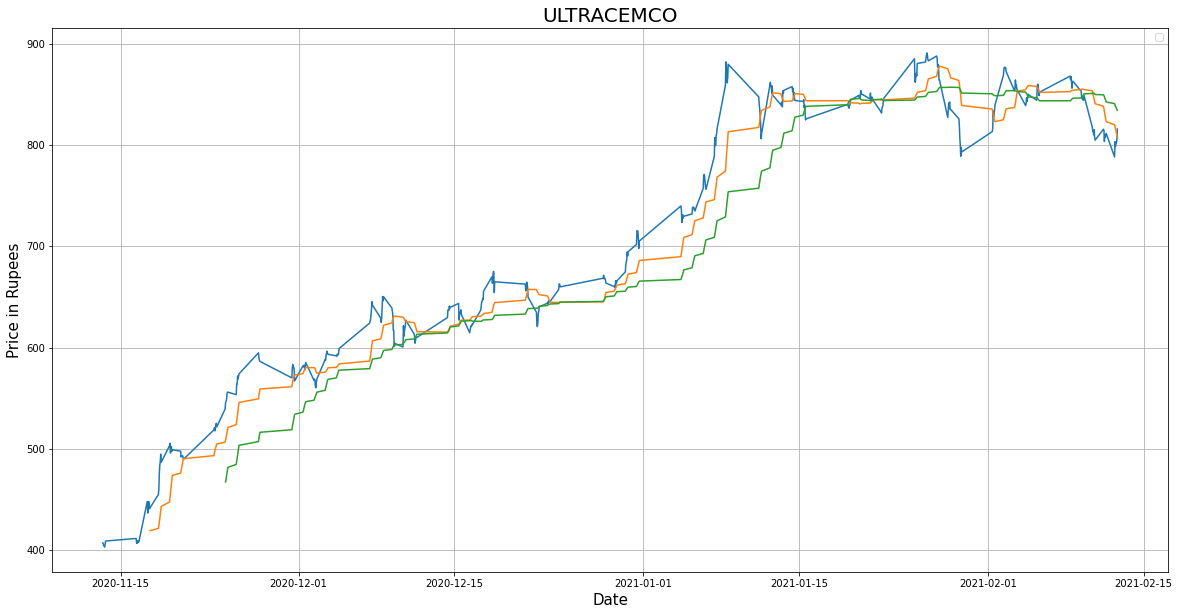

In [13]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
plt.plot(data.index,Data[:,3])
plt.plot(data.index,Data[:,4])
plt.plot(data.index,Data[:,5])
# # plot ‘buy’ signals
# plt.plot(df[0][df[0]['Position'] == 1].index, 
#          df[0]['20_SMA'][df[0]['Position'] == 1], 
#          '^', markersize = 15, color = 'g', label = 'buy')
# # plot ‘sell’ signals
# plt.plot(df[0][df[0]['Position'] == -1].index, 
#          df[0]['20_SMA'][df[0]['Position'] == -1], 
#          'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [24]:
fig = go.Figure()

#Candlestick
stock_name= num_name[0]
fig.add_trace(go.Candlestick(x=data.index,
                open=Data[:,0],
                high=Data[:,1],
                low=Data[:,2],
                close=Data[:,3], name = f'{stock_name} '))

# data['20_SMA'].plot(color = 'b',label = '20-day SMA') 
# data['50_SMA'].plot(color = 'g', label = '50-day SMA')

# fig = px.line(x=fruits, y=[1,3,2], color=px.Constant("This year"),
#              labels=dict(x="Fruit", y="Amount", color="Time Period"))

fig.add_trace(go.Scatter(
        x=data.index,
        y=Data[:,4],name="20SMA"
    ))
fig.add_trace(go.Scatter(
        x=data.index,
        y=Data[:,5],name="50SMA"
    ))
# fig.add_bar(x=fruits, y=[2,1,3], name="Last year")

# Add titles
fig.update_layout(
    title=f'{stock_name} live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=False,
    rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            # dict(values=["2019-12-25", "2020-12-24"])  # hide holidays (Christmas and New Year's, etc)
        ],
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=5, label="5d", step="day", stepmode="backward"),
            dict(count=1, label="DTD", step="day", stepmode="todate"),
            dict(count=15, label="15", step="day", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

In [20]:
fig = go.Figure()

#Candlestick
stock_name= num_name[0]
# fig.add_trace(go.Candlestick(x=data.index,
#                 open=Data[:,0],
#                 high=Data[:,1],
#                 low=Data[:,2],
#                 close=Data[:,3], name = f'{stock_name} '))

# data['20_SMA'].plot(color = 'b',label = '20-day SMA') 
# data['50_SMA'].plot(color = 'g', label = '50-day SMA')

# fig = px.line(x=fruits, y=[1,3,2], color=px.Constant("This year"),
#              labels=dict(x="Fruit", y="Amount", color="Time Period"))
fig.add_trace(go.Scatter(
        x=data.index,
        y=Data[:,3],name="Close"
    ))
fig.add_trace(go.Scatter(
        x=data.index,
        y=Data[:,4],name="20SMA"
    ))
fig.add_trace(go.Scatter(
        x=data.index,
        y=Data[:,5],name="50SMA"
    ))

# # # plot ‘buy’ signals
# fig.plot(data[data['Position'] == 1].index, 
#          data['20_SMA'][data['Position'] == 1], 
#          '^', markersize = 15, color = 'g', label = 'buy')
# # plot ‘sell’ signals
# fig.plot(data[data['Position'] == -1].index, 
#          data['20_SMA'][data['Position'] == -1], 
#          'v', markersize = 15, color = 'r', label = 'sell')

# df = px.data.iris()
# fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")

# fig.update_traces(marker=dict(size=12,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))

# fig.add_bar(x=fruits, y=[2,1,3], name="Last year")

# Add titles
fig.update_layout(
    title=f'{stock_name} live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    
    rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            # dict(values=["2019-12-25", "2020-12-24"])  # hide holidays (Christmas and New Year's, etc)
    ],
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=5, label="5d", step="day", stepmode="backward"),
            dict(count=1, label="DTD", step="day", stepmode="todate"),
            dict(count=15, label="15", step="day", stepmode="backward"),
            dict(step="all")
        ])
    ))


         
    
    


#Show
fig.show()

In [23]:
fig = go.Figure()

#Candlestick
stock_name= num_name[0]
fig.add_trace(go.Candlestick(x=data.index,
                open=df[0]['Open'],
                high=df[0]['High'],
                low=df[0]['Low'],
                close=df[0]['Close'], name = f'{stock_name} '))
# fig.add_trace(go.Scatter(
#         x=data.index,
#         y=df[0]['Close'],name=f"{stock_name}"
#     ))
fig.add_trace(go.Scatter(
        x=data.index,
        y=Data[:,5],name="50SMA"
    ))

fig.add_trace(go.Scatter(
        x=data.index,
        y=Data[:,4],name="20SMA"
    ))

# fig.add_bar(x=fruits, y=[2,1,3], name="Last year")

# Add titles
fig.update_layout(
    title=f'{stock_name} live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=False,
    rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            # dict(values=["2019-12-25", "2020-12-24"])  # hide holidays (Christmas and New Year's, etc)
    ],
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=5, label="5d", step="day", stepmode="backward"),
            dict(count=1, label="DTD", step="day", stepmode="todate"),
            dict(count=15, label="15", step="day", stepmode="backward"),
            dict(step="all")
        ])
    ))


         
    
    


#Show
fig.show()